In [4]:
import numpy as np
# pylint: disable=line-too-long
from linear_solvers import NumPyLinearSolver, HHL

In [14]:
matrix = np.array([[1, -1/3], [-1/3, 1]])
vector = np.array([0.48063554, 0.87692045])
naive_hhl_solution = HHL().solve(matrix, vector)

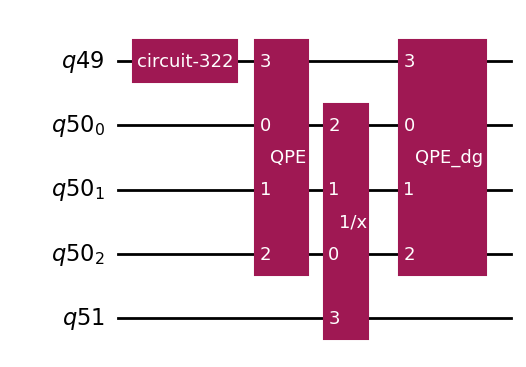

In [15]:
naive_hhl_solution.state.draw("mpl", style="iqp")

In [16]:
from qiskit.quantum_info import Statevector

In [17]:
naive_sv = Statevector(naive_hhl_solution.state).data
naive_full_vector = np.array([naive_sv[16], naive_sv[17]])

In [18]:
print(naive_full_vector)

[0.57970677+1.76214053e-16j 0.77784922+2.83086113e-16j]


In [19]:
from linear_solvers.matrices.tridiagonal_toeplitz import TridiagonalToeplitz
tridi_matrix = TridiagonalToeplitz(1, 1, -1 / 3)
tridi_solution = HHL().solve(tridi_matrix, vector)
tridi_sv = Statevector(tridi_solution.state).data
tridi_full_vector = np.array([tridi_sv[16], tridi_sv[17]])
print(tridi_full_vector)

[0.57970677-4.40361869e-16j 0.77784922+2.41647042e-16j]


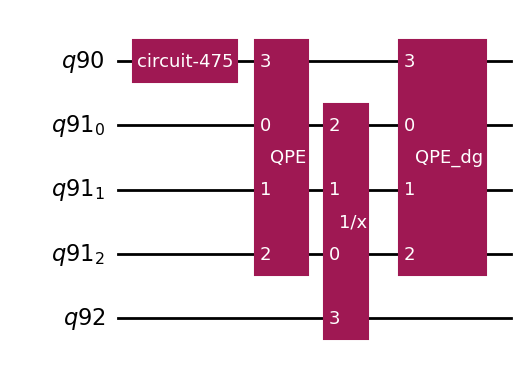

In [20]:
tridi_solution.state.draw("mpl", style="iqp")

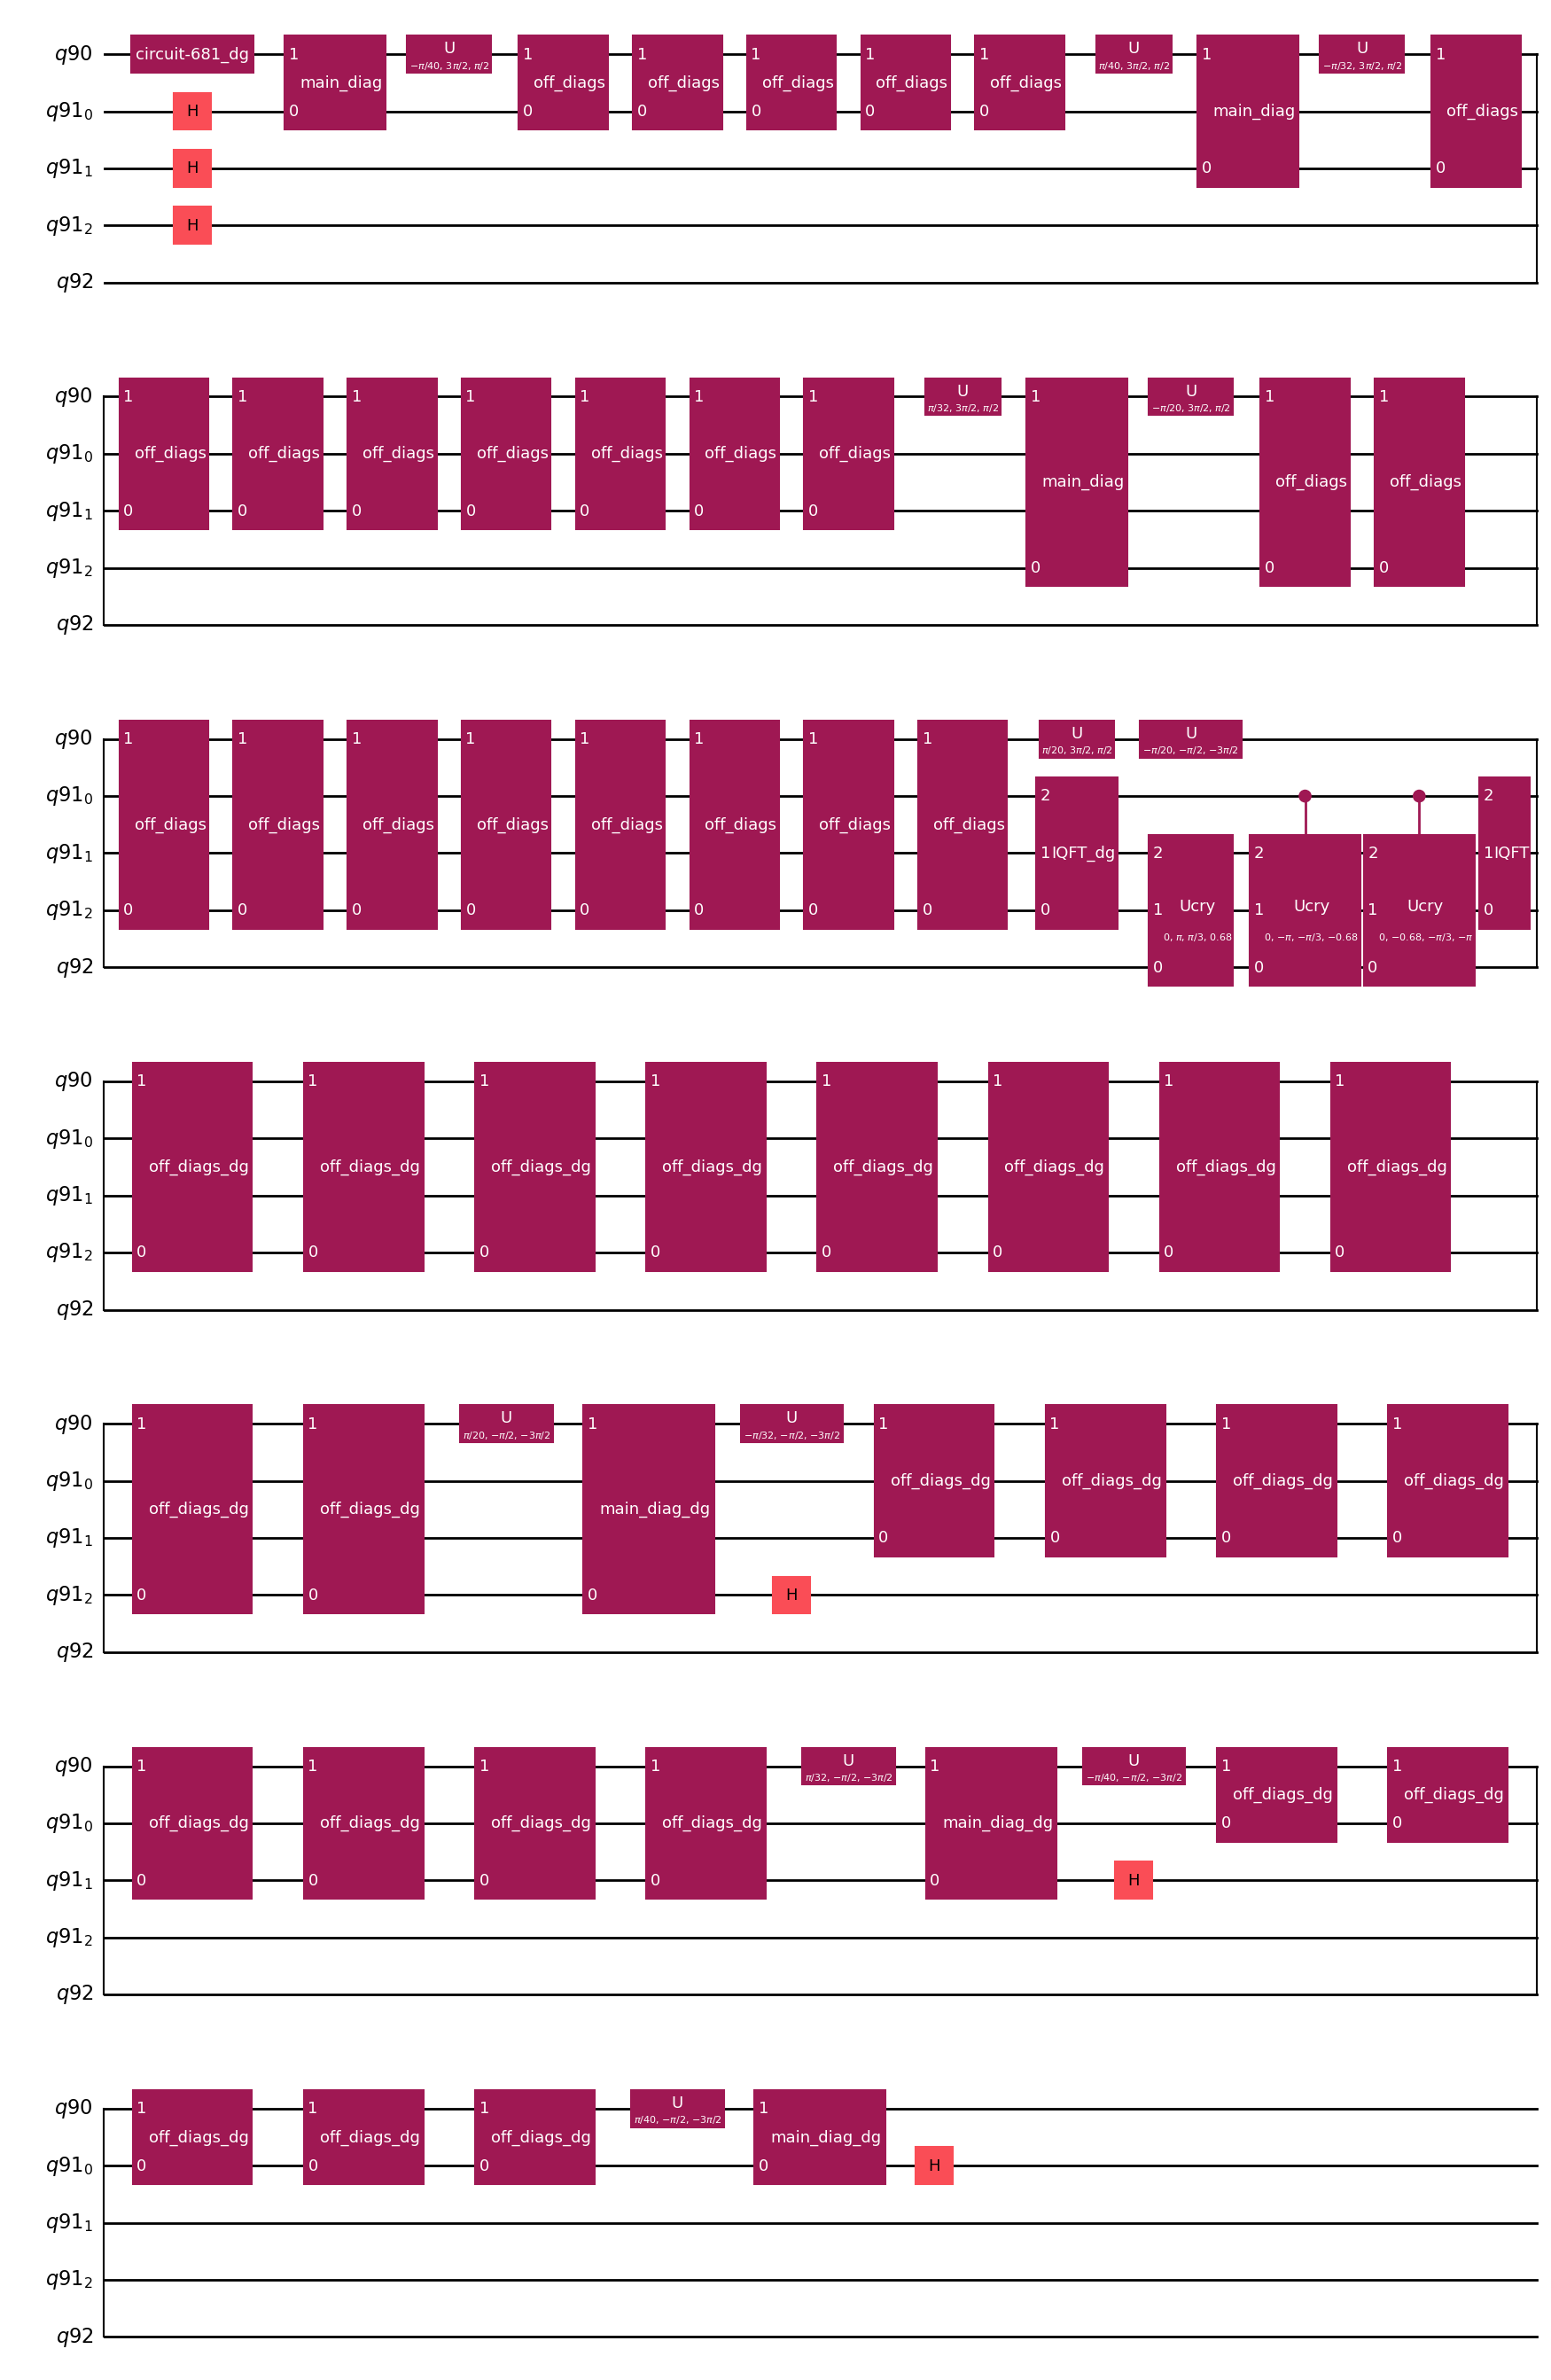

In [22]:
qc = tridi_solution.state
qc.decompose().decompose().draw("mpl", style="iqp")